# Examples

In [1]:
%run ../setup.ipynb

(dft-impulse)=
## Impulse and delay

As a first example, let's look at an impulse:

```{math}
\blue{x_|[n]} = \begin{cases}
1 & \text{if } n = 0\\
0 & \text{otherwise}.
\end{cases}
```

In this example, the DFT equation {eq}`dft-polar` gives us


\begin{align*}
\darkblue{X[m]} &= \sum_{n=0}^{N-1} \blue{x_|[n]} \cdot \purple{\exp\left(-\mathrm{j}\cdot 2\pi \cdot m\cdot n / N \right)}\\
&= \blue{x_|[0]} \cdot \purple{\exp\left(-\mathrm{j}\cdot 2\pi \cdot m \cdot 0 / N \right)} & \text{because }\blue{x_|[n\neq 0]} = 0\\
&= \blue{1} & \text{because } \purple{\exp(0)} = 1.
\end{align*}


So each DFT component has value $\darkblue{X[m]} = 1 = 1 + 0\mathrm{j}$.

More generally, we can consider a $d$-step delay signal:

```{math}

\blue{x[n]} = 
\begin{cases}
1 & \text{if } n = d\\
0 & \text{otherwise}.
\end{cases}
```

which gives us a DFT sequence:


\begin{align*}
\darkblue{X[m]} &= \sum_{n=0}^{N-1} \blue{x[n]} \cdot \purple{\exp\left(-\mathrm{j}\cdot 2\pi \cdot m\cdot n / N \right)}\\
&= \blue{x[d]} \cdot \purple{\exp\left(-\mathrm{j}\cdot 2\pi \cdot m \cdot d/ N \right)} & \text{because }\blue{x[n\neq d]} = 0\\
&= \purple{\exp\left(-\mathrm{j}\cdot 2\pi \cdot m \cdot d / N \right)}.
\end{align*}


Figure {numref}`impulse-dft` illustrates this for a few different values of $d$.

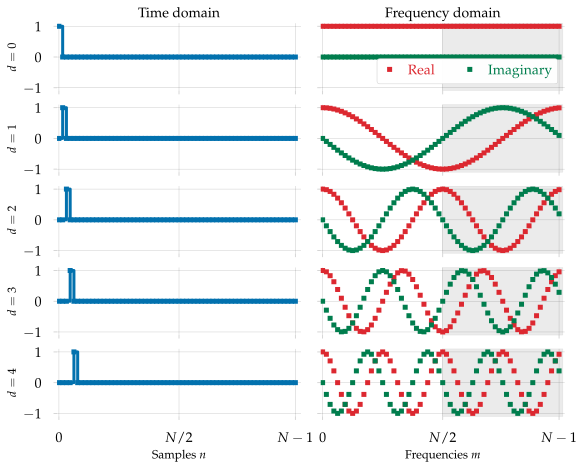

In [2]:
fig, ax = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=figaspect(0.8))

N = 64

for n in range(5):
    x = np.zeros(N)
    x[n] = 1
    X = np.fft.fft(x)
    ax[n, 0].step(np.arange(len(x)), x, marker='s', where='post')
    ax[n, 1].plot(X.real, marker='s',  linestyle='', label='Real', color=colors[1])
    ax[n, 1].plot(X.imag, marker='s', linestyle='', label='Imaginary', color=colors[5])
    ax[n, 0].set(ylabel='$d={}$'.format(n))
    ax[n, 0].label_outer()
    ax[n, 1].label_outer()
    ax[n, 1].axvspan(N/2, N, color=colors[3], alpha=0.1, zorder=-2)
    
ax[0, 1].legend(loc='lower right', ncol=2, labelcolor='markerfacecolor')
ax[-1, 0].set(xlabel='Samples $n$', xlim=[-0.5, N+0.5])
ax[-1, 1].set(xticks=[0, N/2, N-1], xticklabels=[0, '$N/2$', '$N-1$'],
                 xlabel='Frequencies $m$', xlim=[-0.5, N+0.5]);

ax[0, 0].set(title='Time domain')
ax[0, 1].set(title='Frequency domain');
glue('impulse', fig, display=False)

```{glue:figure} impulse
---
name: impulse-dft
---

Each row shows the time-domain (left) and frequency-domain (right) representation of a $d$-step delay signal (for varying values of $d$.  The shaded region corresponds to negative analysis frequencies.
```

Viewed as a sequence (over $m$), the DFT of a delayed impulse produces two sinusoids (one real, one imaginary) which cycle $d$ times over the duration of the signal.

This will be useful later on when we revisit convolution!

(example-sinusoids)=
## Sinusoids

Since the DFT turns impulses into sinusoids, the next logical question to ask is what the DFT does to sinusoids?
Luckily, we've already gone through the work of figuring this out in previous sections.

Let $\blue{x[n]}$ be a sinusoid at analysis frequency index $k \notin \{0, N/2\}$ with phase $\phi$ and amplitude $A$:

```{math}
\blue{x[n] = A\cdot \cos\left(2\pi \cdot \frac{k}{N} \cdot n + \phi \right)}
```

For $\red{m}=k$, we will have

\begin{align*}
\darkblue{X[k]}
&= \frac{N}{2}\cdot A \cdot \left( \red{\cos\left(\phi\right)} - \green{\mathrm{j}\cdot\sin(\phi)} \right)\\
&= \frac{N}{2}\cdot A \cdot \purple{\exp\left(-\mathrm{j}\phi\right)}. & \text{By Euler's formula}
\end{align*}


But what about the rest of the spectrum?

First, let's look at $\red{m=N-k}$.
For the real part of the reference signal, we'll have

\begin{align*}
\red{\cos\left(2\pi \cdot \frac{N-k}{N} \cdot n \right)}
&= 
\red{\cos\left(2\pi \cdot \frac{k-N}{N} \cdot n \right)} & \cos(\theta) = \cos(-\theta)\\
&= 
\red{\cos\left(2\pi \cdot \frac{k-N}{N} \cdot n  + 2\pi \cdot \frac{N}{N}\cdot n\right)} &
\text{Add a whole number of rotations}\\
&= 
\red{\cos\left(2\pi \cdot \frac{k-N + N}{N} \cdot n \right)} & \text{Collect like terms}\\
&= 
\red{\cos\left(2\pi \cdot \frac{k}{N} \cdot n \right)} & \text{Cancel } N-N=0,
\end{align*}


so the real part of $\darkblue{X[N-k]}$ is the same as for $\darkblue{X[k]}$.
For the imaginary part, we'll get a sign flip:

\begin{align*}
\green{-\sin\left(2\pi \cdot \frac{N-k}{N} \cdot n \right)}
&= 
\green{+\sin\left(2\pi \cdot \frac{k-N}{N} \cdot n \right)} & -\sin(\theta) = \sin(-\theta)\\
&= 
\green{\sin\left(2\pi \cdot \frac{k-N + N}{N} \cdot n \right)}\\
&= 
\green{\sin\left(2\pi \cdot \frac{k}{N} \cdot n \right)},
\end{align*}

so the imaginary part of $\darkblue{X[N-k]}$ is the *opposite* of $\darkblue{X[k]}$.
This gives us

\begin{align*}
\darkblue{X[N-k]}
&= \frac{N}{2}\cdot A \cdot \left( \red{\cos\left(\phi\right)}
+ \green{\mathrm{j}\cdot\sin(\phi)}
\right)\\
&= \frac{N}{2}\cdot A \cdot \purple{\exp\left(+\mathrm{j}\phi\right)}. & \text{By Euler's formula}
\end{align*}

For all other $\red{m \neq k}$, we will get $\darkblue{X[m] = 0}$.

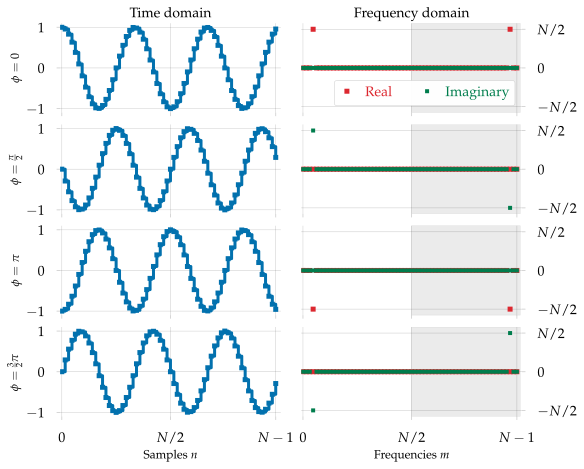

In [3]:
from fractions import Fraction

M = 4
fig, ax = plt.subplots(nrows=M, ncols=2, sharex=True, figsize=figaspect(0.8))

N = 64

labs = ['0', r'\frac{\pi}{2}', r'\pi', r'\frac{3}{2}\pi']

for n in range(M):
    phi = 2 * np.pi * n / M
    x = np.cos(2 * np.pi * 3 / N * np.arange(N) + phi)
    X = np.fft.fft(x)
    ax[n, 0].step(np.arange(len(x)), x, marker='s', where='post',)
    ax[n, 1].plot(X.real, marker='s', linestyle='', label='Real', color=colors[1])
    ax[n, 1].plot(X.imag, marker='s', markersize=4, linestyle='', label='Imaginary', color=colors[5])
    
    ax[n, 0].set(ylabel='$\\phi={}$'.format(labs[n]))
    ax[n, 0].label_outer()
    ax[n, 1].label_outer()
    ax[n, 1].yaxis.tick_right()
    ax[n, 1].set(yticks=[-N/2, 0, N/2], yticklabels=['$-N/2$', 0, '$N/2$'])
    ax[n, 1].set(ylim=[-N/2 - 5, N/2 + 5])
    ax[n, 1].axvspan(N/2, N, color=colors[3], alpha=0.1, zorder=-2)
    
ax[0, 1].legend(loc='lower right', ncol=2, labelcolor='markerfacecolor')
ax[-1, 0].set(xlabel='Samples $n$', xlim=[-0.5, N+0.5])
ax[-1, 1].set(xticks=[0, N/2, N-1], xticklabels=[0, '$N/2$', '$N-1$'],
                 xlabel='Frequencies $m$', xlim=[-0.5, N+0.5]);

ax[0, 0].set(title='Time domain')
ax[0, 1].set(title='Frequency domain');
glue('wave-dft', fig, display=False)

```{glue:figure} wave-dft
---
name: wave-dft
---

**Left**: sinusoids at analysis frequency $k=3$ with varying phase $\phi$.
**Right**: the DFT of a sinusoid is a pair of impulses located at $k$ and $N-k$.
The height of the impulses depends on the phase $\phi$.
```

(trumpet-recording)=
## A real sound

The examples above are helpful for building intuition about how the DFT behaves on idealized, synthetic signals.
However, it's also helpful to see how the DFT behaves on a real signal.
Here, we'll use the DFT to visualize a recording of a single note played on a trumpet.

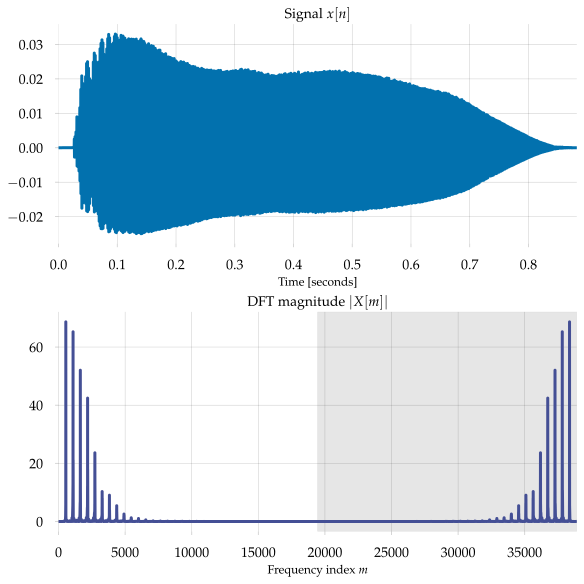

In [4]:
# We'll use soundfile to load the signal
import soundfile as sf

# And IPython to play it back in the browser
from IPython.display import Audio, display

# A single note (D#5) played on a trumpet
# https://freesound.org/s/48224/
# License: CC BY-NC 3.0
x, fs = sf.read('48224__slothrop__trumpetf3.wav')

# Play the audio back
display(Audio(data=x, rate=fs))

# How many samples do we have?
N = len(x)

# Compute its DFT
X = np.fft.fft(x)

# and plot both the signal and its spectrum
fig, (ax_time, ax_freq) = plt.subplots(nrows=2)

# get the sample times for x
time = np.arange(N) / fs

# plot the signal
ax_time.plot(time, x)  

ax_time.set(xlabel='Time [seconds]', title='Signal $x[n]$')

# plot the magnitudes |X[m]|
ax_freq.plot(np.abs(X), color=colors[11])  

# We'll shade the negative frequency range
ax_freq.axvspan(N/2, N, color='k', alpha=0.1, zorder=-1)  
ax_freq.set(xlabel='Frequency index $m$', title='DFT magnitude $|X[m]|$');

The first plot illustrates the raw waveform $\blue{x[n]}$.  While it's possible to discern some properties of the audio from the plot (e.g., how its amplitude rises and decays over time), it's virtually impossible to infer anything about the pitch or frequency content of the note.

The magnitude spectrum (second plot) shows some interesting structure, but it would be easier to understand if we use the actual analysis frequency values $f_m$ rather than their index $m$ for the horizontal axis.

We could calculate this manually using the rule
```{math}
f_m = \begin{cases}
\frac{m}{N} \cdot f_s & \text{if } 0 \leq m < N/2\\
\frac{N-m}{N} \cdot f_s & \text{if } N/2 \leq m < N.
\end{cases}
```
Fortunately, ``numpy`` gives a function that does exactly this for us: ``np.fft.fftfreq``.
It takes as input the number of samples $N$ and the sample period $t_s = 1/f_s$.
So we can instead do:

```python
freqs = np.fft.fftfreq(N, 1/fs)
ax_freq.plot(freqs, np.abs(X))
```

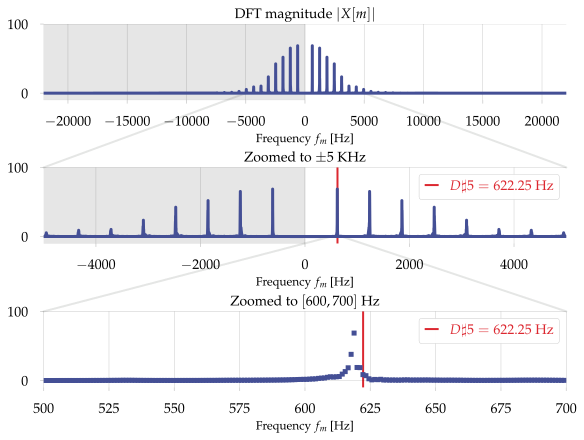

In [5]:
from matplotlib.patches import ConnectionPatch

fig, (ax_freq, ax_zoom, ax_zoom2) = plt.subplots(nrows=3, sharey=True, figsize=figaspect(0.75))

freqs = np.fft.fftfreq(N, 1./fs)
ax_freq.plot(freqs, np.abs(X), color=colors[11])  # plot the magnitudes |X[m]|
ax_freq.axvspan(-fs/2, 0, color='k', alpha=0.1, zorder=-1)  # We'll shade the negative frequency range
ax_freq.set(xlabel='Frequency $f_m$ [Hz]', title='DFT magnitude $|X[m]|$');

idx = (np.abs(freqs) <= 5000)
ax_zoom.plot(freqs[idx], np.abs(X[idx]), color=colors[11])  # plot the magnitudes |X[m]|
ax_zoom.axvspan(-fs/2, 0, color='k', alpha=0.1, zorder=-1)  # We'll shade the negative frequency range
ax_zoom.set(xlim=[-5000, 5000])
ax_zoom.set(xlabel='Frequency $f_m$ [Hz]', title='Zoomed to $\pm 5$ KHz');
ax_zoom.axvline(622.25, color=colors[1], linewidth=2, 
                   label='$D\\sharp 5=622.25$ Hz', zorder=-10)
ax_zoom.legend(loc='upper right', labelcolor='markerfacecolor')
ax_zoom.set_ylim([-10, 100])

c1 = ConnectionPatch((0, 1), (-5000, 0), "axes fraction", "data", axesA=ax_zoom, axesB=ax_freq, linestyle='-',
                         linewidth=2, color=colors[3], alpha=0.125, zorder=-10)
c2 = ConnectionPatch((1, 1), (5000, 0), "axes fraction", "data", axesA=ax_zoom, axesB=ax_freq, linestyle='-',
                         linewidth=2, color=colors[3], alpha=0.125, zorder=-10)
fig.add_artist(c1)
fig.add_artist(c2)

idx = (500 <= freqs) & (freqs <= 700)
ax_zoom2.plot(freqs[idx], np.abs(X[idx]), marker='s', linestyle='', color=colors[11])  # plot the magnitudes |X[m]|
ax_zoom2.set(xlim=[500, 700])
ax_zoom2.set(xlabel='Frequency $f_m$ [Hz]', title='Zoomed to $[600, 700]$ Hz');
ax_zoom2.axvline(622.25, color=colors[1], linewidth=2, 
                   label='$D\\sharp 5=622.25$ Hz', zorder=-10)

c3 = ConnectionPatch((0, 1), (500, 0), "axes fraction", "data", axesA=ax_zoom2, axesB=ax_zoom, linestyle='-',
                         linewidth=2, color=colors[3], alpha=0.125, zorder=-10)
c4 = ConnectionPatch((1, 1), (700, 0), "axes fraction", "data", axesA=ax_zoom2, axesB=ax_zoom, linestyle='-',
                         linewidth=2, color=colors[3], alpha=0.125, zorder=-10)
fig.add_artist(c3)
fig.add_artist(c4)

ax_zoom2.legend(loc='upper right', labelcolor='markerfacecolor')
glue('trumpet-dft', fig, display=False);

```{glue:figure} trumpet-dft
---
name: trumpet-dft
---
The DFT spectrum $\darkblue{|X[m]|}$ of a trumpet playing D#5 = 622.25 Hz, plotted as a function of analysis frequency $f_m$.
The middle and bottom plots contain the same information as the top, but zoomed into $\pm 5$ KHz (middle) and $[500, 700]$ Hz (bottom).
A prominent peak can be observed near $f_m \approx 622.25$ (and -622.25).
```

From {numref}`trumpet-dft` we can observe that the magnitude spectrum $|X[m]|$ is very sparse: it has small magnitudes for most frequencies (near 0).
The first prominent peak (starting from 0 and looking to the right) that we can see is very close to the frequency of the note: $D\sharp 5$.
If we want to find the actual frequency of the peak in the spectrum we can do so as follows:
```python
# get our DFT frequencies
frequencies = np.fft.fftfreq(N, 1./fs)  

# find m index of largest magnitude
peak_m = np.argmax(np.abs(X))  

# Get the f0
f0 = frequencies[peak_m]  
```
Note that the peak is not *exactly* at the ideal pitch for $D\sharp 5 = 622.25$: it lands about 10 cents flat at 618.8 Hz, with energy spread out around neighboring frequencies.
This is still much closer to $D\sharp 5$ than $D5 = 587.33$ though, so we would still perceive it as a $D\sharp$.
This spread of energy is quite common, though it can be counter-intuitive the first time you see it.
It happens because naturally generated frequencies are almost never exactly at our analysis frequencies.
We'll come back to this point in the next chapter.

If we continue looking at increasing frequencies $f_m$ (middle plot), we will find other peaks evenly spaced.
These correspond to the *harmonics* (also known as *overtones* or *partials*) of the note being played.

````{admonition} Definition: harmonic series
For a given fundamental frequency $f_0$, its **harmonic series** is given by
```{math}
f_k = (k+1)\cdot f_0 \quad\quad k = 1, 2, 3, \dots
```
````

In the case of $f_0 = 622.25$, its harmonic series is the sequence $622.25, 1244.5, 1866.75, 2489.0, \dots$.
The amount of energy at each harmonic of a fundamental frequency differs from one instrument to the next, and this is part of what gives each instrument its distinctive *timbre*.

If the signal is relatively simple (e.g., an isolated source playing a single note), the DFT is a great way to quickly get a sense of its frequency content.
Do not be deceived by this example though: most signals are *not* simple, and a visual inspection of the DFT is not generally sufficient to understand all signals.

## Summary

We've now seen the DFT applied to several kinds of signals, producing very different behaviors.
Sometimes we can reason about the DFT analytically, as in the first two examples.
Impulses and delays look like sinusoids in the frequency domain.
Sinusoids look like (pairs of) impulses.

Other times, the best we can do is approach it empirically (as in the case of the trumpet recording), and observe the output of the DFT.
With a little practice, one can learn to use the DFT to quickly get a sense of the contents of a signal that are not readily apparent from its waveform.

In the next few chapters, we'll dig deeper into the theoretical properties of the DFT.